<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/Kursach/%D0%9F%D1%83%D0%BD%D0%BA%D1%82_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
# <br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Барбашин Андрей Алексеевич</h5>
# <h5 style="text-align: right;">Группа: ТФэ-01-20</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>





#  Вариант №1

#  $\space$ Дано:
# * Тип турбины: К-800-23,5 ЛМЗ
# * $P_0 = 25 \space МПа $ - Начальное давление
# * $t_0 = 560 ^\circ C$ -  Начальная температура
# * $P_{пп} = 3.62 \space МПа$ -  Давление промперегрева
# * $t_{пп} = 565 ^\circ C$ -  Температура промперегрева
# * $P_{к} = 3.5 \space кПа$ -  Давление в конденсаторе
# * $t_{п.в.} = 269^\circ C$ -  Температура питаталеьной воды

# * $N_{э} = 830 \space МВт$ -  Электрическая мощность
# * z = 9 -  Число отборов

# # 1. Построение процесса расширения пара в турбине.
# Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [ ]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iapws: filename=iapws-1.5.3-py3-none-any.whl size=114282 sha256=617409e9d321e0fdaf0321f25c9ff802ba4005eefd94f59bd636fa185cec4527
  Stored in directory: /root/.cache/pip/wheels/54/ba/11/fdea0d216e8fb4c2e8e112cd6f9032ec3ff199b073973e1960
Successfully built iapws


In [ ]:
!cp /content/drive/MyDrive/chast1.py /content

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
import chast1

In [ ]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [ ]:
p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269 #Температура питательной воды
electrical_power = 830 * (10 ** 6) #Электричесская мощность
z = 9 #Число отборов шт.
avg_diameter = 0.9 / 1000# dр.с. = 0,9 - 1,1
rotation_speed = 50 #n
H_0 = 105
p_feed_water = 1.35 * p_0 #Давление питательной воды

internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

In [ ]:
G_0 = chast1.get_inlet_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)
G_k = chast1.get_condenser_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)

print("Массовый расход в турбину на входе", G_0)
print("Массовый расход в конденсатор:", G_k)

Массовый расход в турбину на входе 646.008110523921
Массовый расход в конденсатор: 432.2683742564051


In [ ]:
_point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water = chast1.get_points(p_0, t_0, p_middle, t_middle, p_k, p_feed_water, t_feed_water, internal_efficiency)

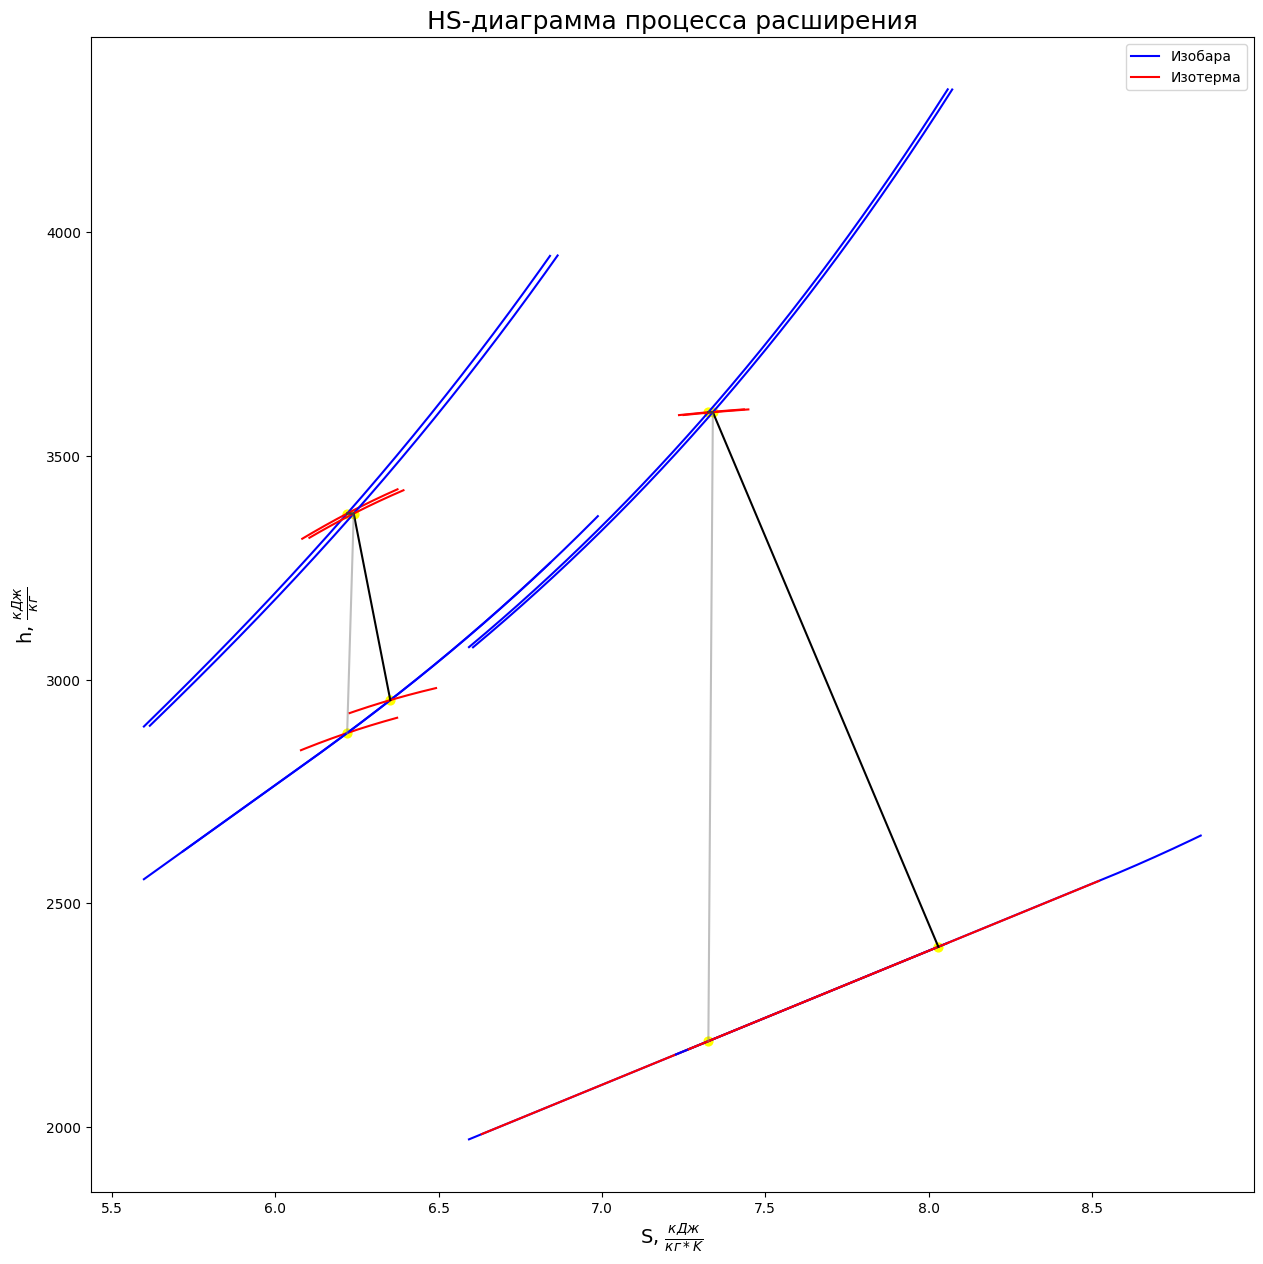

In [19]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

chast1.plot_hs([_point_0, point_0, point_1t, point_1], ax = ax)
chast1.plot_hs([_point_middle, point_middle, point_2t, point_2], ax = ax)
chast1.plot_process([_point_0, point_0, point_1], ax = ax, color='black')
chast1.plot_process([_point_middle, point_middle, point_2], ax = ax, color='black')
chast1.plot_process([_point_0, point_0, point_1t], ax=ax, alpha=0.5, color='grey')
chast1.plot_process([_point_middle, point_middle, point_2t], ax=ax, alpha=0.5, color='grey')

In [ ]:
import math as m
import numpy as np

#окружная скорость на среднем диаметре u
u = m.pi * avg_diameter * rotation_speed
#степень реактивности
ro = 0.05 #степень реактивности принять в диапазоне 0,05-0,1
#Изоэнтропийный теплоперепад сопловой решетки по параметрам торможения
Hoc = (1 - ro) * H_0
#Изоэнтропийный теплоперепад в рабочей решетке по статическим параметрам
Hop = H_0 * ro
#Теоретическая энтальпия за сопловой решеткой
h1t = _point_0.h - Hoc
#Теоретическая скорость выхода из сопловых лопаток
c1t = m.sqrt(2 * H_0)
#Скорость звука за сопловой решеткой (теоретическая)
k = 1.380649 * (10 ** -23)
p1 = gas(h = h1t, s = _point_0.s)
v1t = gas(h = h1t, s = _point_0.s)
a1t = m.sqrt(k * p1.P * v1t.v)
#Число Маха по скорости c1t
M1t = c1t / a1t
#Выходная площадь сопловой решетки (предварительная) 
mu1 = 0.97
F1 = (G_0 * v1t.v) / (mu1 * c1t)
alfa1_e = 10 #Угол α1э направления скорости с1t, град Принимаем в диапазоне α1э=10-16
#Произведение el1
el1 = F1 / (m.pi * avg_diameter * m.sin(m.radians(alfa1_e)))
#Оптимальное значение степени парциальности eопт
e_opt = 4 * m.sqrt(el1) #так как получилось больше 0,85 принимаем e_opt = 0.85
print(e_opt)
e_opt = 0.85
#Высота сопловых лопаток 𝑙1
l1 = el1 / e_opt
#
b1 = 51.5 / 1000
#Уточняем коэффициент расхода сопловой решетки
mu1 = 0.982 - 0.005 * (b1 / l1)
#Количество лопаток в сопловой решетке z1
t1opt = 0.72
z1 = (m.pi * avg_diameter * e_opt) / (b1 * t1opt) #???
print(z1)
z1 = 65
#После округления z1 уточним относительный шаг
t1 = (m.pi * avg_diameter * e_opt) / (b1 *z1)
t1
#Угол установки лопатки в сопловой решетке αуст
#alfa_ust = 
#Коэффициент потерь в сопловой решетке ζс
#ksi_c = 
#Коэффициент скорости сопловой решетки φ
#fi = m.sqrt(1 - (ksi_c / 100))
#Проверяем коэффициент скорости сопловой решетки φ'
#fi_ = 0.98 - 0.008 * (b1 / l1)
#Находим расхождение между φ и φ'
#delta = (fi - fi_) / fi
#Скорость выхода пара из сопловой решетки с1

#Угол alfa1 вектора скорости с1


